In [1]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('/content/traffic.jpg')

gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges_canny = cv2.Canny(gray_img, 100, 150)

laplacian_filter = cv2.Laplacian(gray_img, cv2.CV_64F)
laplacian_abs_val = np.absolute(laplacian_filter)
marr_hildreth_edges = cv2.convertScaleAbs(laplacian_abs_val)

factor = 1

canny_result = cv2.add(image, cv2.merge([edges_canny] * 3) * factor)
canny_result = np.clip(canny_result, 0, 255).astype(np.uint8)

marr_hildreth_result = cv2.add(image, cv2.merge([marr_hildreth_edges] * 3) * factor)
marr_hildreth_result = np.clip(marr_hildreth_result, 0, 255).astype(np.uint8)


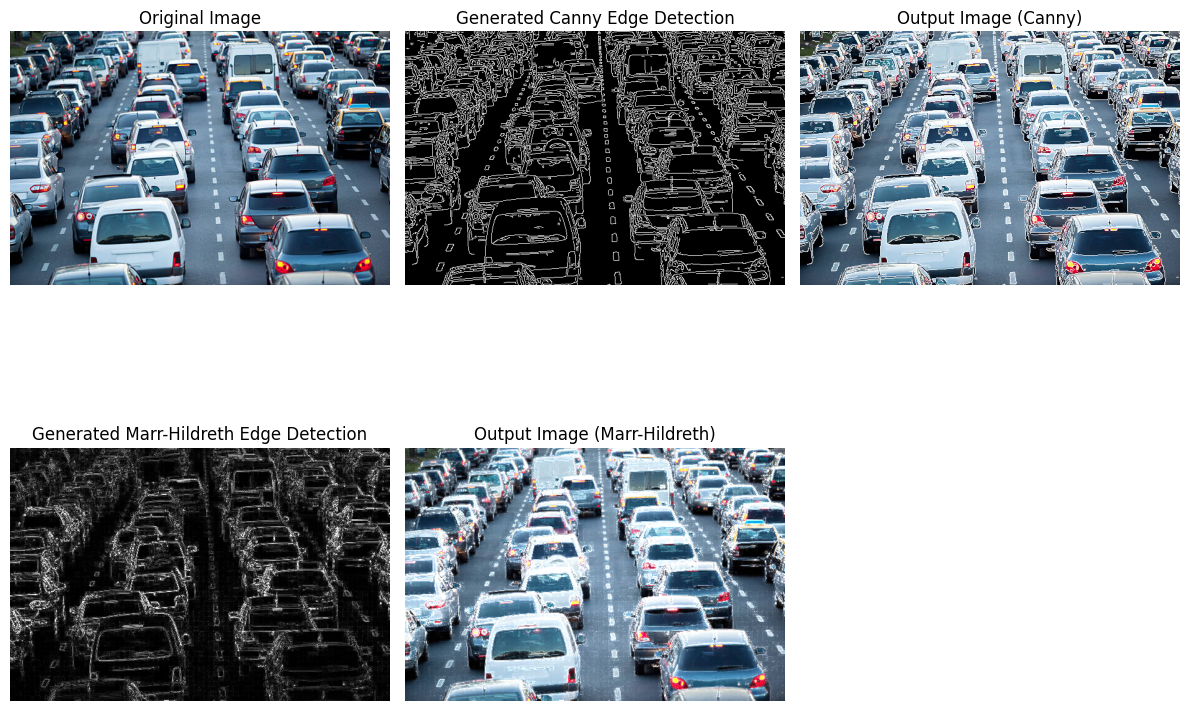

In [4]:
# Display the images
plt.figure(figsize=(12, 9))

# Display the original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(edges_canny, cmap='gray')
plt.title('Generated Canny Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(canny_result, cv2.COLOR_BGR2RGB))
plt.title('Output Image (Canny)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(marr_hildreth_edges, cmap='gray')
plt.title('Generated Marr-Hildreth Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(marr_hildreth_result, cv2.COLOR_BGR2RGB))
plt.title('Output Image (Marr-Hildreth)')
plt.axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.tight_layout()
plt.show()
